In [1]:
import numpy as np
import pandas as pd
import time
import random
import math
import os
import re
import json
import ast
import matplotlib.pyplot as plt
from helper_functions_assignment2 import*

## statistical tests

In [2]:
# scipy contains statistical tests and other useful content
import scipy.stats
from scipy.stats import norm

def print_decision(pvalue, alpha):
    print("Test Result:")
    print("p-value = %.4f" % (pvalue))
    if pvalue < alpha:
        print("H0 can be rejected on a level of significance of " + str(alpha) + ".")
    else:
        print("H0 cannot be rejected on a level of significance of " + str(alpha) + ".")
        
def compute_pvalue(pvalue, diff, alternative):
    if alternative == "greater":
        if diff > 0:
            pvalue = pvalue / 2
        else:
            pvalue = 1 - pvalue / 2
    elif alternative == "less":
        if diff < 0:
            pvalue = pvalue / 2
        else:
            pvalue = 1 - pvalue / 2
    return pvalue

def plot_hist(data, group):
    # Plot a histogram
    plt.hist(data, density = True, alpha = 0.5)

    # Fit a normal distribution to the data
    mu, std = norm.fit(data)

    # Plot the probability density function
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 201)
    y = norm.pdf(x, mu, std)
    plt.plot(x, y, "black")
    title = "Fit results of " + group + ": mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)

    plt.show()

In [3]:
# Parameters for data import to be set
file_A = "GA_test_results.csv"
file_B = "ALNS_test_results.csv"
name_A = "score"
name_B = "score"

# Parameters for the tests to be set
alternative = "two-sided"
alpha = 0.05

In [4]:
df_A = pd.read_csv(file_A, sep = ";", decimal = ".", usecols = [name_A])
df_B = pd.read_csv(file_B, sep = ";", decimal = ".", usecols = [name_B])

data_A = df_A[name_A]
data_B = df_B[name_B]
print("mean score of A", np.mean(data_A))
print("mean score of B", np.mean(data_B))

mean score of A 15236.51282051282
mean score of B 17658.53846153846


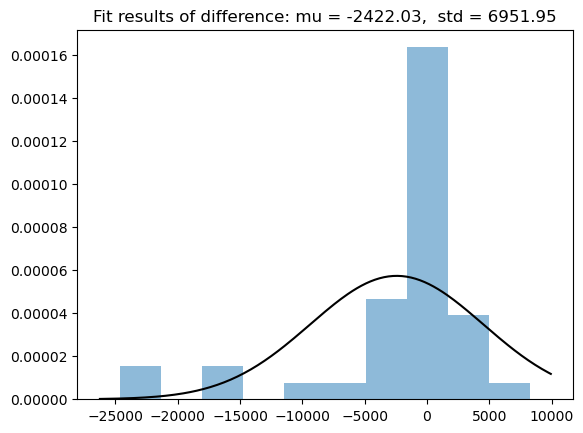

In [5]:
plot_hist(data_A - data_B, "difference")

In [ ]:
## t-test if applicable

In [ ]:
# Apply the statistical test
res = scipy.stats.ttest_rel(data_A, data_B)
pvalue = res.pvalue

# Compute the correct p-value (two-sided vs. one-sided)
pvalue = compute_pvalue(res.pvalue, np.mean(data_A) - np.mean(data_B), alternative)

# Print results
print_decision(pvalue, alpha)

In [6]:
## else wilcoxon

In [7]:
# Apply the statistical test
res = scipy.stats.wilcoxon(data_A, data_B, alternative = alternative)

# Print results
print_decision(res.pvalue, alpha)

Test Result:
p-value = 0.1574
H0 cannot be rejected on a level of significance of 0.05.


C:\Users\Johanna\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
